## 自定义KMeans

In [1]:
'''导入工具包'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
'''创造数据集'''
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})
print(len(df['x']))

19


In [3]:
'''随机初始化初始聚类中心'''
np.random.seed(200)
k = 3   
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}

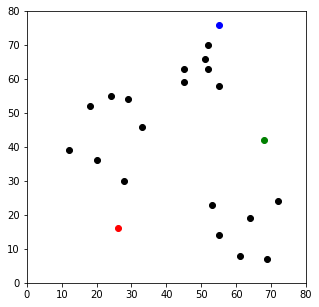

In [4]:
'''绘图'''
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [5]:
'''k-Means距离计算函数'''
def assignment(df, centroids):
    for i in centroids.keys():
        # 利用欧氏距离 sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    # print(df)
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # print('三列为：', centroid_distance_cols)
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1) # 寻找3列中的最小值
    # print(df['closest'])
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_'))) # 将列名映射为数字
    # print(df['closest'])
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [6]:
df = assignment(df, centroids)
print(df)

     x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0   12  39        26.925824        56.080300        56.727418        1     r
1   20  36        20.880613        48.373546        53.150729        1     r
2   28  30        14.142136        41.761226        53.338541        1     r
3   18  52        36.878178        50.990195        44.102154        1     r
4   29  54        38.118237        40.804412        34.058773        3     b
5   33  46        30.805844        35.227830        37.202150        1     r
6   24  55        39.051248        45.880279        37.443290        3     b
7   45  59        47.010637        28.600699        19.723083        3     b
8   45  63        50.695167        31.144823        16.401219        3     b
9   52  70        59.933296        32.249031         6.708204        3     b
10  51  66        55.901699        29.410882        10.770330        3     b
11  52  63        53.712196        26.400758        13.341664        3     b

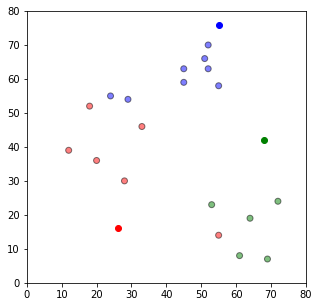

In [7]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [8]:
old_centroids = copy.deepcopy(centroids)  # 记录上一步的聚类中心

In [9]:
'''更新聚类中心'''
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [10]:
centroids = update(centroids)

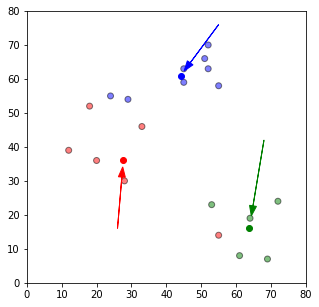

In [11]:
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

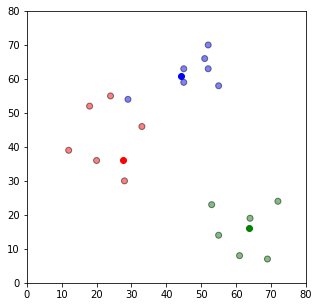

In [12]:
'''重复分配过程'''
df = assignment(df, centroids)

# Plot results
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

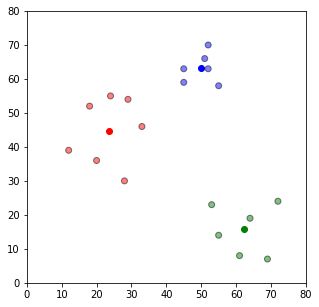

In [13]:
# 继续直到所有分配的类别不再改变
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

## 使用scikit.learn中的KMeans

In [59]:
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [60]:
labels = kmeans.predict(df)
print(labels)
centroids = kmeans.cluster_centers_

[1 1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0]


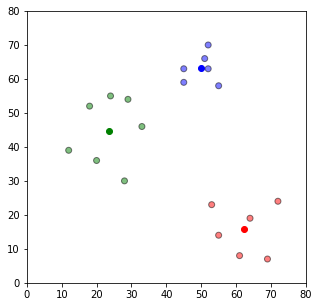

In [61]:
fig = plt.figure(figsize=(5, 5))

colmap = {1: 'r', 2: 'g', 3: 'b'}

df['colors'] = ([colmap[i+1] for i in labels])

plt.scatter(df['x'], df['y'], color=df['colors'], alpha=0.5, edgecolor='k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()